# Imports

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Constants

In [5]:
DATASET_PATH = "/kaggle/input/weather-underground/weather_data.csv"

# Code

In [9]:
df = pd.read_csv(DATASET_PATH)

# Convert 'date' and 'time' column data types
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'], format='%I:%M %p').dt.time

# # Combine 'date' and 'time' columns into a single datetime column
df['datetime'] = df.apply(lambda row: datetime.combine(row['date'], row['time']), axis=1)

# # Drop the original 'date' and 'time' columns as they are no longer needed
df = df.drop(columns=['date', 'time'])

# Filter data from Jan'24 till May'24
start_date = '2024-01-01'
df = df[(df['datetime'] >= start_date)]

df.head(3)

,temperature,dew_point,humidity,wind,wind_speed,wind_gust,pressure,precip,condition,city,country,datetime
1418,61,37,42,ENE,5,0,29.98,0.0,Haze,Karachi,Pakistan,2024-01-01 00:00:00
1419,61,37,42,N,5,0,29.95,0.0,Haze,Karachi,Pakistan,2024-01-01 00:30:00
1420,61,37,42,NNE,5,0,29.95,0.0,Haze,Karachi,Pakistan,2024-01-01 01:00:00


In [16]:
df['temperature_diff'] = df['temperature'].diff().dropna()

## Scatter Plot

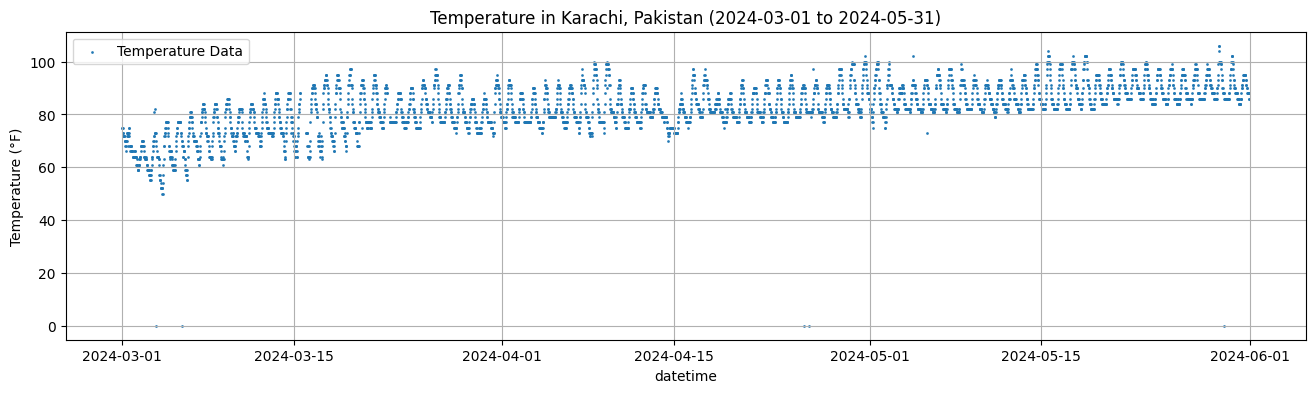

In [12]:
df_temp = df[(df['datetime'] >= "2024-03-01")]

# Plot the scatter plot
plt.figure(figsize=(16, 4))
plt.scatter(df_temp['datetime'], df_temp['temperature'], s=1, alpha=0.9, label='Temperature Data')
plt.title('Temperature in Karachi, Pakistan (2024-03-01 to 2024-05-31)')
plt.xlabel('datetime')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.legend()
plt.show()

## ACF and PACF plots for Temperature (Wihtout Differencing)

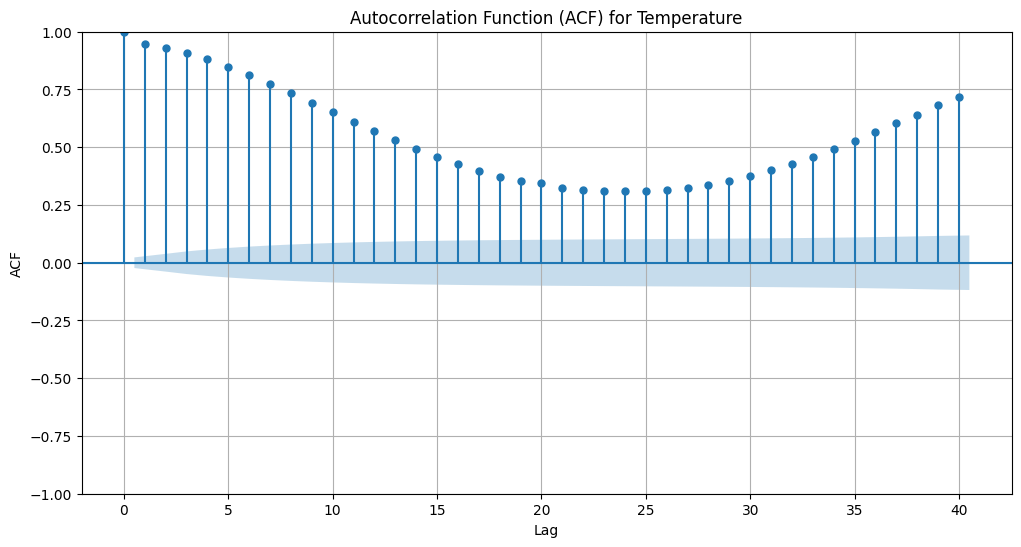

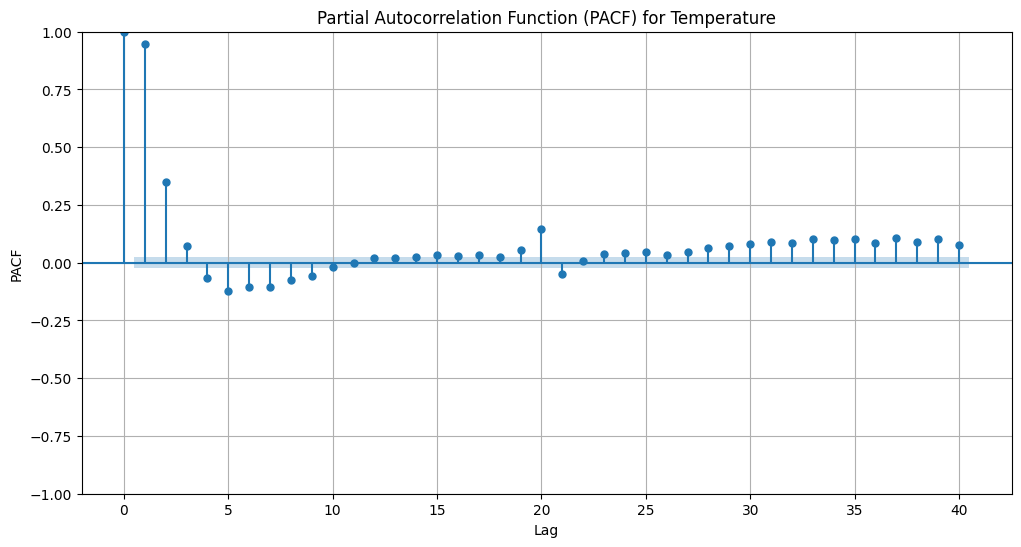

In [15]:
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df['temperature'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Temperature')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df['temperature'], lags=40, method='ywm', ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for Temperature')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

### Interpreting ACF and PACF Plots

**ACF Plot**:
- The ACF plot shows a slow decay, which typically indicates the presence of a non-stationary series. This suggests that differencing might be needed to achieve stationarity.
- Significant autocorrelations at various lags (up to around lag 20) further support the non-stationarity of the series.

**PACF Plot**:
- The PACF plot shows a sharp cut-off after the first lag, which is typical for an AR process. 
- This suggests that an autoregressive (AR) component might be appropriate for the model.


#### Choosing ARIMA Model
Given the characteristics of the plots:

- **Differencing (d)**: Since the ACF plot shows a slow decay, you might need to difference the series to make it stationary. Start with d=1.
- **Autoregressive (AR) term (p)**: The PACF plot suggests a significant spike at lag 1 and a sharp drop afterward. This indicates an AR(1) component, so p=1.
- **Moving Average (MA) term (q)**: The ACF plot does not show a clear cut-off, suggesting that an MA component might be less clear. However, you might start with q=0 and adjust based on model performance.